In [1]:
import numpy as np

num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0,3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class
)

In [2]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

targets = np.vstack((
    np.zeros((num_samples_per_class,1), dtype="float32"),
    np.ones((num_samples_per_class,1), dtype="float32"),
    ))

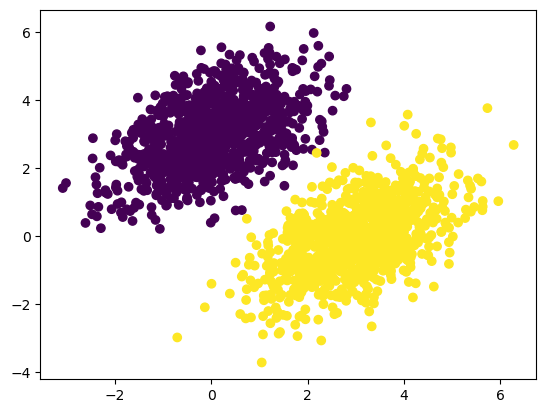

In [4]:
import matplotlib.pyplot as plt

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])

In [5]:
import tensorflow as tf

input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim,output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [6]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [7]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [8]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [9]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 7.4544
Loss at step 1: 0.9946
Loss at step 2: 0.2690
Loss at step 3: 0.1710
Loss at step 4: 0.1488
Loss at step 5: 0.1366
Loss at step 6: 0.1265
Loss at step 7: 0.1173
Loss at step 8: 0.1090
Loss at step 9: 0.1015
Loss at step 10: 0.0946
Loss at step 11: 0.0883
Loss at step 12: 0.0827
Loss at step 13: 0.0775
Loss at step 14: 0.0728
Loss at step 15: 0.0685
Loss at step 16: 0.0646
Loss at step 17: 0.0610
Loss at step 18: 0.0578
Loss at step 19: 0.0548
Loss at step 20: 0.0522
Loss at step 21: 0.0497
Loss at step 22: 0.0475
Loss at step 23: 0.0455
Loss at step 24: 0.0436
Loss at step 25: 0.0420
Loss at step 26: 0.0404
Loss at step 27: 0.0391
Loss at step 28: 0.0378
Loss at step 29: 0.0367
Loss at step 30: 0.0356
Loss at step 31: 0.0347
Loss at step 32: 0.0338
Loss at step 33: 0.0330
Loss at step 34: 0.0323
Loss at step 35: 0.0316
Loss at step 36: 0.0310
Loss at step 37: 0.0305
Loss at step 38: 0.0300
Loss at step 39: 0.0296


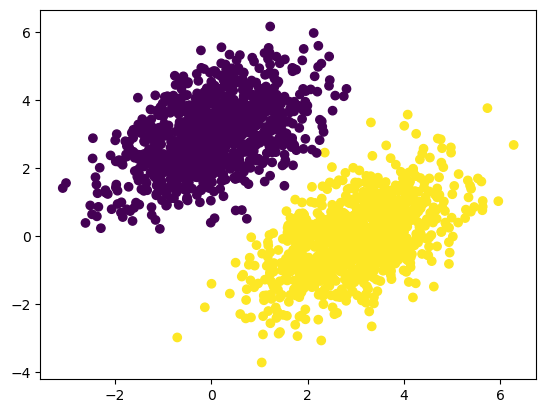

In [10]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

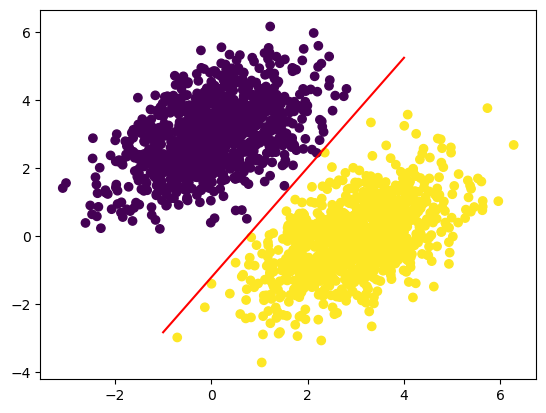

In [11]:
x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)